<a href="https://colab.research.google.com/github/thekaveez/kaveez-DL/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: thekaaveez
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight


100%|██████████| 20.3k/20.3k [00:00<00:00, 2.42MB/s]

In [4]:
data = pd.read_csv('/content/male-female-height-and-weight/Test set.csv')

In [5]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [6]:
data.loc[data['Sex'] == 'Male', 'Sex'] = 1
data.loc[data['Sex'] == 'Female', 'Sex'] = 0

In [7]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [8]:
X = data.drop('Sex', axis=1)
y = data['Sex']

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=['Height', 'Weight'])

In [59]:
X.head()

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


In [60]:
y[:5]

,Sex
0,0
1,1
2,1
3,1
4,0


In [62]:
y = y.astype('int')

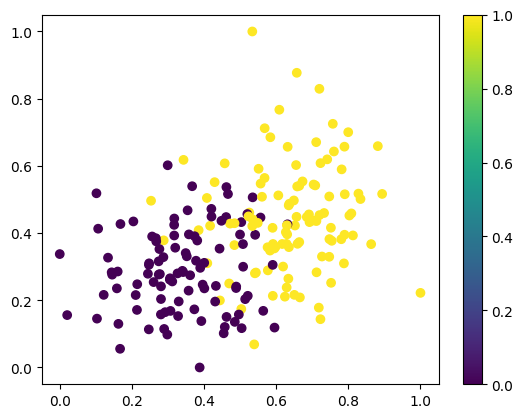

In [63]:
plt.scatter(X['Height'], X['Weight'], c=y)
plt.colorbar()
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X_train.shape

(164, 2)

# Model Building

In [66]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
              metrics = ['accuracy'])

# train model
epoch_number = 20
history = model.fit(X_train, y_train, epochs = epoch_number)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.5190 - loss: 0.7028
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5532 - loss: 0.6836 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6015 - loss: 0.6675 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6533 - loss: 0.6522 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6629 - loss: 0.6259 
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7521 - loss: 0.5917 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7751 - loss: 0.5421 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7866 - loss: 0.4980 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8064 - loss: 0.4493 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8526 - loss: 0.4073  
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8771 - loss: 0.3624 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8897 - loss: 0.3219 
Epoch 13/2

In [67]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,749 (14.65 KB)

 Trainable params: 1,249 (4.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,500 (9.77 KB)

# Model Evaluate

In [68]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.9141 - loss: 0.2649


[0.2763058841228485, 0.9024389982223511]

In [69]:
y_pred = model.predict(X_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


In [70]:
y_pred[:5]

array([[0.17083442],
       [0.9594913 ],
       [0.97870785],
       [0.24797185],
       [0.9584471 ]], dtype=float32)

In [71]:
y_test[:5]

,Sex
15,0
9,1
100,1
132,0
68,1


In [72]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8636364>

In [73]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.95>

<Axes: >

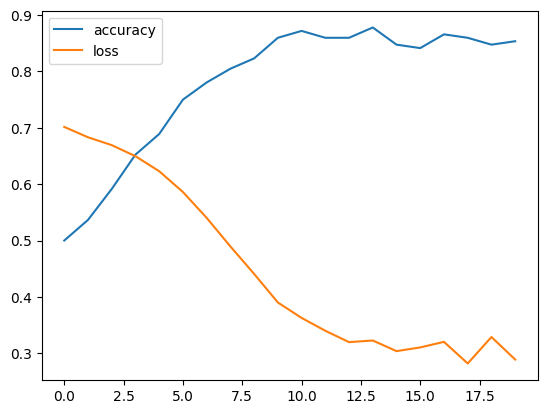

In [74]:
pd.DataFrame(history.history).plot()

# Multiclass Clasification

In [75]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# compile model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
              metrics = ['accuracy'])

# train model
epoch_number = 20
history = model.fit(X_train, y_train, epochs = epoch_number)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.4524 - loss: 0.6982
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5165 - loss: 0.6603 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5414 - loss: 0.6247 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5937 - loss: 0.6065 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7714 - loss: 0.5770 
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7623 - loss: 0.5602 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8078 - loss: 0.5036 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7926 - loss: 0.4817 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8279 - loss: 0.4238 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8245 - loss: 0.3947 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8763 - loss: 0.3591 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8550 - loss: 0.3433 
Epoch 13/20

In [76]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,800 (14.85 KB)

 Trainable params: 1,266 (4.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,534 (9.90 KB)

In [77]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step - accuracy: 0.8979 - loss: 0.2874


[0.2996765077114105, 0.8780487775802612]

In [78]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 277ms/step


In [79]:
y_pred[:5]

array([[0.8230358 , 0.17696424],
       [0.01375126, 0.9862488 ],
       [0.00655805, 0.99344194],
       [0.6601337 , 0.33986628],
       [0.01941175, 0.98058826]], dtype=float32)

In [80]:
y_test[:5]

,Sex
15,0
9,1
100,1
132,0
68,1


In [84]:
# Precision
# precision = tf.keras.metrics.Precision()
# precision.update_state(y_test, y_pred)
# precision.result()

In [85]:
# Recall
# recall = tf.keras.metrics.Recall()
# recall.update_state(y_test, y_pred)
# recall.result()

<Axes: >

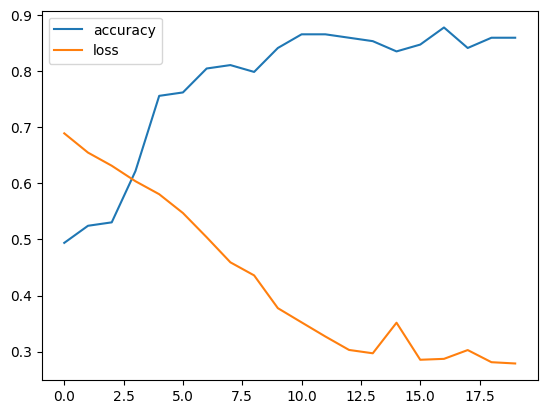

In [83]:
pd.DataFrame(history.history).plot()